# Assignment 3

In this assignment, you will try to gather information from open data via API and visualize them.

We will use the API from wikipedia as an example.

Please go to [this web page](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews), to learn how to get Pageviews of a certain wikipedia page.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-13-10-57-35-202134.png)

As you can see here, to get a pageview count timeseries of en.wikipedia's article "[Albert Enstein](https://en.wikipedia.org/wiki/Albert_Einstein)" for the month of October 2015, you can use the following url with a "GET" method.

[https://wikimedia.org/api/rest\_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Albert\_Einstein/daily/2015100100/2015103100](https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Albert_Einstein/daily/2015100100/2015103100)

Your task, is to get Pageviews count timeseries of en.wikipedia's article "[University of North Texas](https://en.wikipedia.org/wiki/University_of_North_Texas)" for the month of January 2019.


![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-13-10-57-35-210502.png)

Please answer the following questions by putting your code in the corresponding chunks. You can create new code or text chunks if necessary.



**Question 1. (20 points)** Make the corresponding url to gather the required data, and save it into a variable called 'url'.



In [4]:
url ="https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/University_of_North_Texas/daily/2019010100/2010013100"

**Question 2. (20 points)** Call the API by using the url you created in Question 1, and print out the JSON data. (If you are not familiar with JSON format, please follow [this link](https://en.wikipedia.org/wiki/JSON). Also, you can visit [this link](https://www.w3schools.com/python/python_json.asp) to know how to operate on JSON data with Python. )

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-13-10-57-35-196474.png)



In [5]:
import urllib,json
with  urllib.request.urlopen("https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/University_of_North_Texas/daily/2019010100/2019013100") as url:
  data = json.loads(url.read())
print (data)


{'items': [{'project': 'en.wikipedia', 'article': 'University_of_North_Texas', 'granularity': 'daily', 'timestamp': '2019010100', 'access': 'all-access', 'agent': 'all-agents', 'views': 732}, {'project': 'en.wikipedia', 'article': 'University_of_North_Texas', 'granularity': 'daily', 'timestamp': '2019010200', 'access': 'all-access', 'agent': 'all-agents', 'views': 834}, {'project': 'en.wikipedia', 'article': 'University_of_North_Texas', 'granularity': 'daily', 'timestamp': '2019010300', 'access': 'all-access', 'agent': 'all-agents', 'views': 821}, {'project': 'en.wikipedia', 'article': 'University_of_North_Texas', 'granularity': 'daily', 'timestamp': '2019010400', 'access': 'all-access', 'agent': 'all-agents', 'views': 719}, {'project': 'en.wikipedia', 'article': 'University_of_North_Texas', 'granularity': 'daily', 'timestamp': '2019010500', 'access': 'all-access', 'agent': 'all-agents', 'views': 672}, {'project': 'en.wikipedia', 'article': 'University_of_North_Texas', 'granularity': '

**Question 3. (20 points)** Load the JSON data into Pandas Dataframe, and show the first five rows.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-13-10-57-35-214261.png)



In [7]:
import pandas as pd
resultantdata = pd.DataFrame.from_dict(data.get('items'))
resultantdata[0:5]

,access,agent,article,granularity,project,timestamp,views
0,all-access,all-agents,University_of_North_Texas,daily,en.wikipedia,2019010100,732
1,all-access,all-agents,University_of_North_Texas,daily,en.wikipedia,2019010200,834
2,all-access,all-agents,University_of_North_Texas,daily,en.wikipedia,2019010300,821
3,all-access,all-agents,University_of_North_Texas,daily,en.wikipedia,2019010400,719
4,all-access,all-agents,University_of_North_Texas,daily,en.wikipedia,2019010500,672


**Question 4. (20 points)** Figure out the max and min views and corresponding date.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-13-10-57-35-195410.png)

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-13-10-57-35-197160.png)



In [23]:
df=resultantdata[['timestamp', 'views']]
max=resultantdata['views'].idxmax()
min=resultantdata['views'].idxmin()
print (df.loc[max])
print (df.loc[min])

timestamp    2019010200
views               834
Name: 1, dtype: object
timestamp    2019012700
views               412
Name: 26, dtype: object


**Question 5. (20 points)** Plot line chart of Pageviews for the whole month.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-13-10-57-35-197005.png)


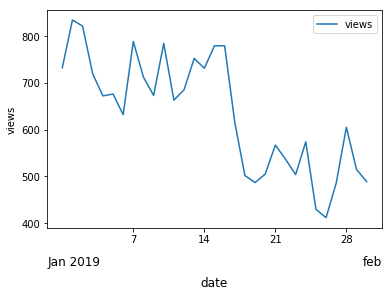

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
resultantdata.views.plot(kind = 'line', legend = 'True')
plt.ylabel('views')
plt.title('feb', loc='right', y=-0.2)
plt.title('Jan 2019', loc='left', y=-0.2)
plt.title('date', y=-0.3)
plt.xticks([7,14,21,28])
plt.show()